# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing the data

In [2]:
stock_data=pd.read_csv('/content/drive/MyDrive/datasets/Production_of_Agriculture_Stock-Ministry_of_Finance (1).csv')
college_data=pd.read_csv('/content/drive/MyDrive/datasets/MergerdAyush_Colleges_in_India_01-04-2021_0 (1).csv')
transport_data=pd.read_csv('/content/drive/MyDrive/datasets/Road_Transport_BRS_2017-18_Annexure7_9c (1).csv')

In [3]:
stock_data.head()

,Particulars,Frequency,Unit,9-2013,10-2013,11-2013,12-2013,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014
0,Foodgrains,Monthly,Ton mn,59.24,62.68,59.69,58.37,55.91,52.48,48.39,63.06,69.85,65.34
1,Foodgrains Rice,Monthly,Ton mn,19.03,16.85,14.22,14.70,16.94,18.88,20.28,20.42,20.65,21.24
2,Foodgrains Unmilled Paddy in term of Rice,Monthly,Ton mn,4.11,11.73,14.41,15.62,14.77,12.76,10.28,8.24,7.61,4.30
3,Foodgrains Wheat,Monthly,Ton mn,36.10,34.10,31.07,28.05,24.20,20.84,17.83,34.40,41.59,39.80


In [4]:
college_data.head()

,State or Union Territory,Type of System,No. of Colleges - Govt,Admission Capacity - Govt,Permitted Seats - Govt,No. of Colleges - Non-Govt,Admission Capacity - Non-Govt,Permitted Seats - Non-Govt
0,Andhra Pradesh,Ayurveda,1,100,100,2,176,118
1,Assam,Ayurveda,1,93,93,0,0,0
2,Bihar,Ayurveda,2,211,211,6,280,153
3,Chhattisgarh,Ayurveda,2,216,216,4,280,250
4,Delhi,Ayurveda,3,359,359,0,0,0


In [5]:
transport_data.head()

,Name of the States,National Highways,State Highways,District Roads,Rural Roads,Urban Roads,Project Roads,Total road Length,Total Population,Road length per '000 pop,Road length per '000 Population - National Highways,Road length per '000 Population - State Highways,Road length per '000 Population - District Roads,Road length per '000 Population - Rural Roads,Road length per '000 Population - Urban roads,Road length per '000 Population - Project Roads
0,Andhra Pradesh,10207,15753,58083,217892,34878,9447,346260,84581,4.09,0.12,0.19,0.69,2.58,0.41,0.11
1,Arunachal Pradesh,2537,13500,8731,20807,56,4924,50555,1384,36.54,1.83,9.76,6.31,15.04,0.04,3.56
2,Assam,3909,2530,6093,303672,5603,21803,343609,31206,11.01,0.13,0.08,0.20,9.73,0.18,0.70
3,Bihar,4877,4006,11145,258800,9184,2559,290571,104099,2.79,0.05,0.04,0.11,2.49,0.09,0.02
4,Chhattisgarh,3592,4176,11965,54308,12765,15772,102578,25545,4.02,0.14,0.16,0.47,2.13,0.50,0.62


# part 1

Dropping the columns 

In [6]:
stock_data.drop(["Frequency", "Unit"],axis=1, inplace=True)

Changing the column names

In [7]:
stock_data.set_axis(["Particulars","Sept-2013", "Oct-2013","Nov-2013","Dec-2013", "Jan-2014", "Feb-2014", "Mar-2014","Apr-2014","May-2014","Jun-2014"], axis="columns", 
                           inplace=True)

Make a dataframe that contains food grains 

In [8]:
df_total_agri = stock_data[(stock_data['Particulars'] == 'Foodgrains')]

Make a dataframe that don't contains food grains

In [9]:
df_foodgrains = stock_data[(stock_data['Particulars'] != 'Foodgrains')]

Converting the date as month using pandas melt function

In [10]:
# melt the data to create a long format
df_melted_agri = df_foodgrains.melt(id_vars=['Particulars'], var_name='Month', value_name='Stock')
df_melted_agri.head()

,Particulars,Month,Stock
0,Foodgrains Rice,Sept-2013,19.03
1,Foodgrains Unmilled Paddy in term of Rice,Sept-2013,4.11
2,Foodgrains Wheat,Sept-2013,36.10
3,Foodgrains Rice,Oct-2013,16.85
4,Foodgrains Unmilled Paddy in term of Rice,Oct-2013,11.73


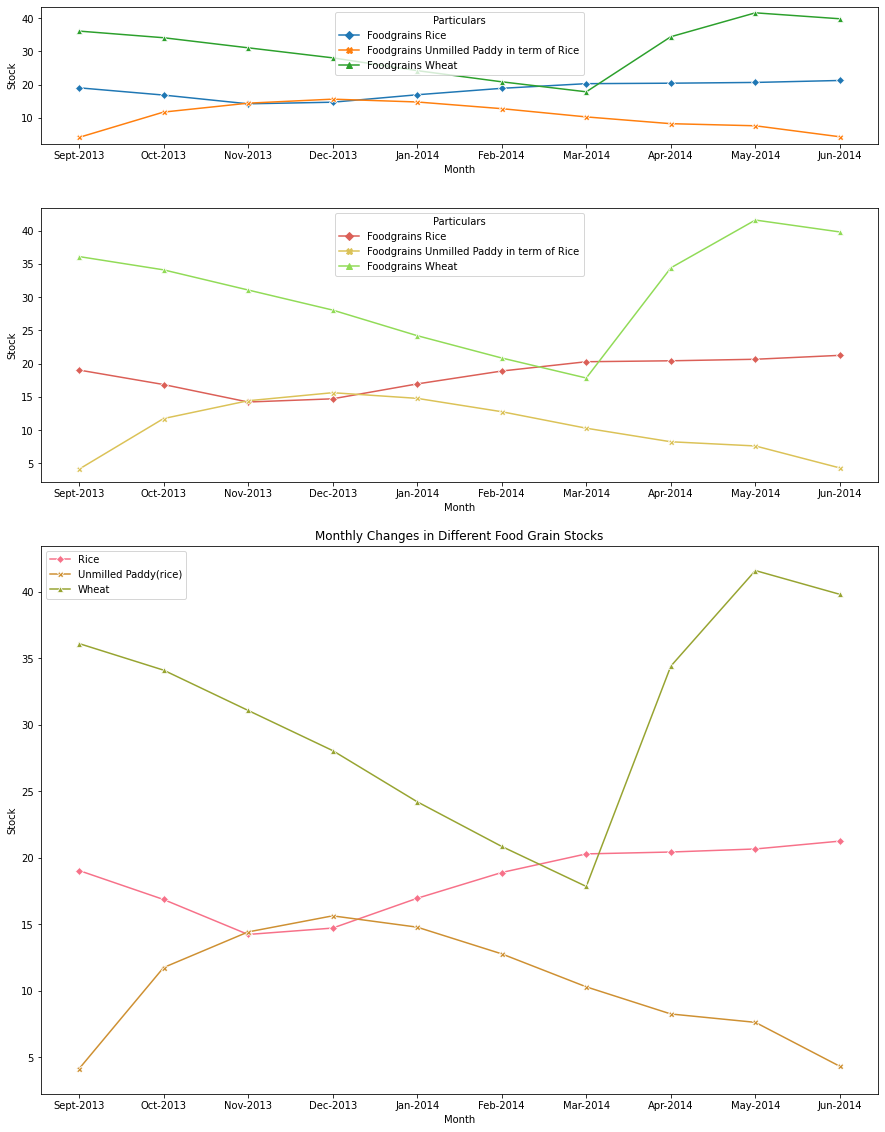

In [17]:
fig, axs = plt.subplots(3,gridspec_kw={'height_ratios': [1, 2, 4]},figsize=(15,20))

sns.lineplot(x='Month', y='Stock', hue='Particulars', data=df_melted_agri,ax=axs[0], style="Particulars",markers=["D", "X", "^"], dashes=False)
sns.set_palette("hls", 8)
sns.lineplot(x='Month', y='Stock', hue='Particulars', data=df_melted_agri,ax=axs[1], style="Particulars",markers=["D", "X", "^"], dashes=False)
sns.set_palette("husl", 8)
sns.lineplot(x='Month', y='Stock', hue='Particulars', data=df_melted_agri,ax=axs[2], style="Particulars",markers=["D", "X", "^"], dashes=False)
sns.set_palette("Set2")
# set title and axis labels
plt.title('Monthly Changes in Different Food Grain Stocks')
plt.xlabel('Month')
plt.ylabel('Stock')
plt.legend(labels = ['Rice', 'Unmilled Paddy(rice)', 'Wheat'])
# display the plot
plt.show()

# part 2

In [18]:
college_data['Type of System'].value_counts()

Ayurveda       26
Homoeopathy    25
Unani          16
Naturopathy    12
Siddha          2
Name: Type of System, dtype: int64

In [19]:
college_data['sum of colleges']=college_data['No. of Colleges - Govt']+college_data['No. of Colleges - Non-Govt']

In [20]:
pt_college_data = pd.pivot_table(college_data, index=['State or Union Territory'], columns=['Type of System'], values='sum of colleges')

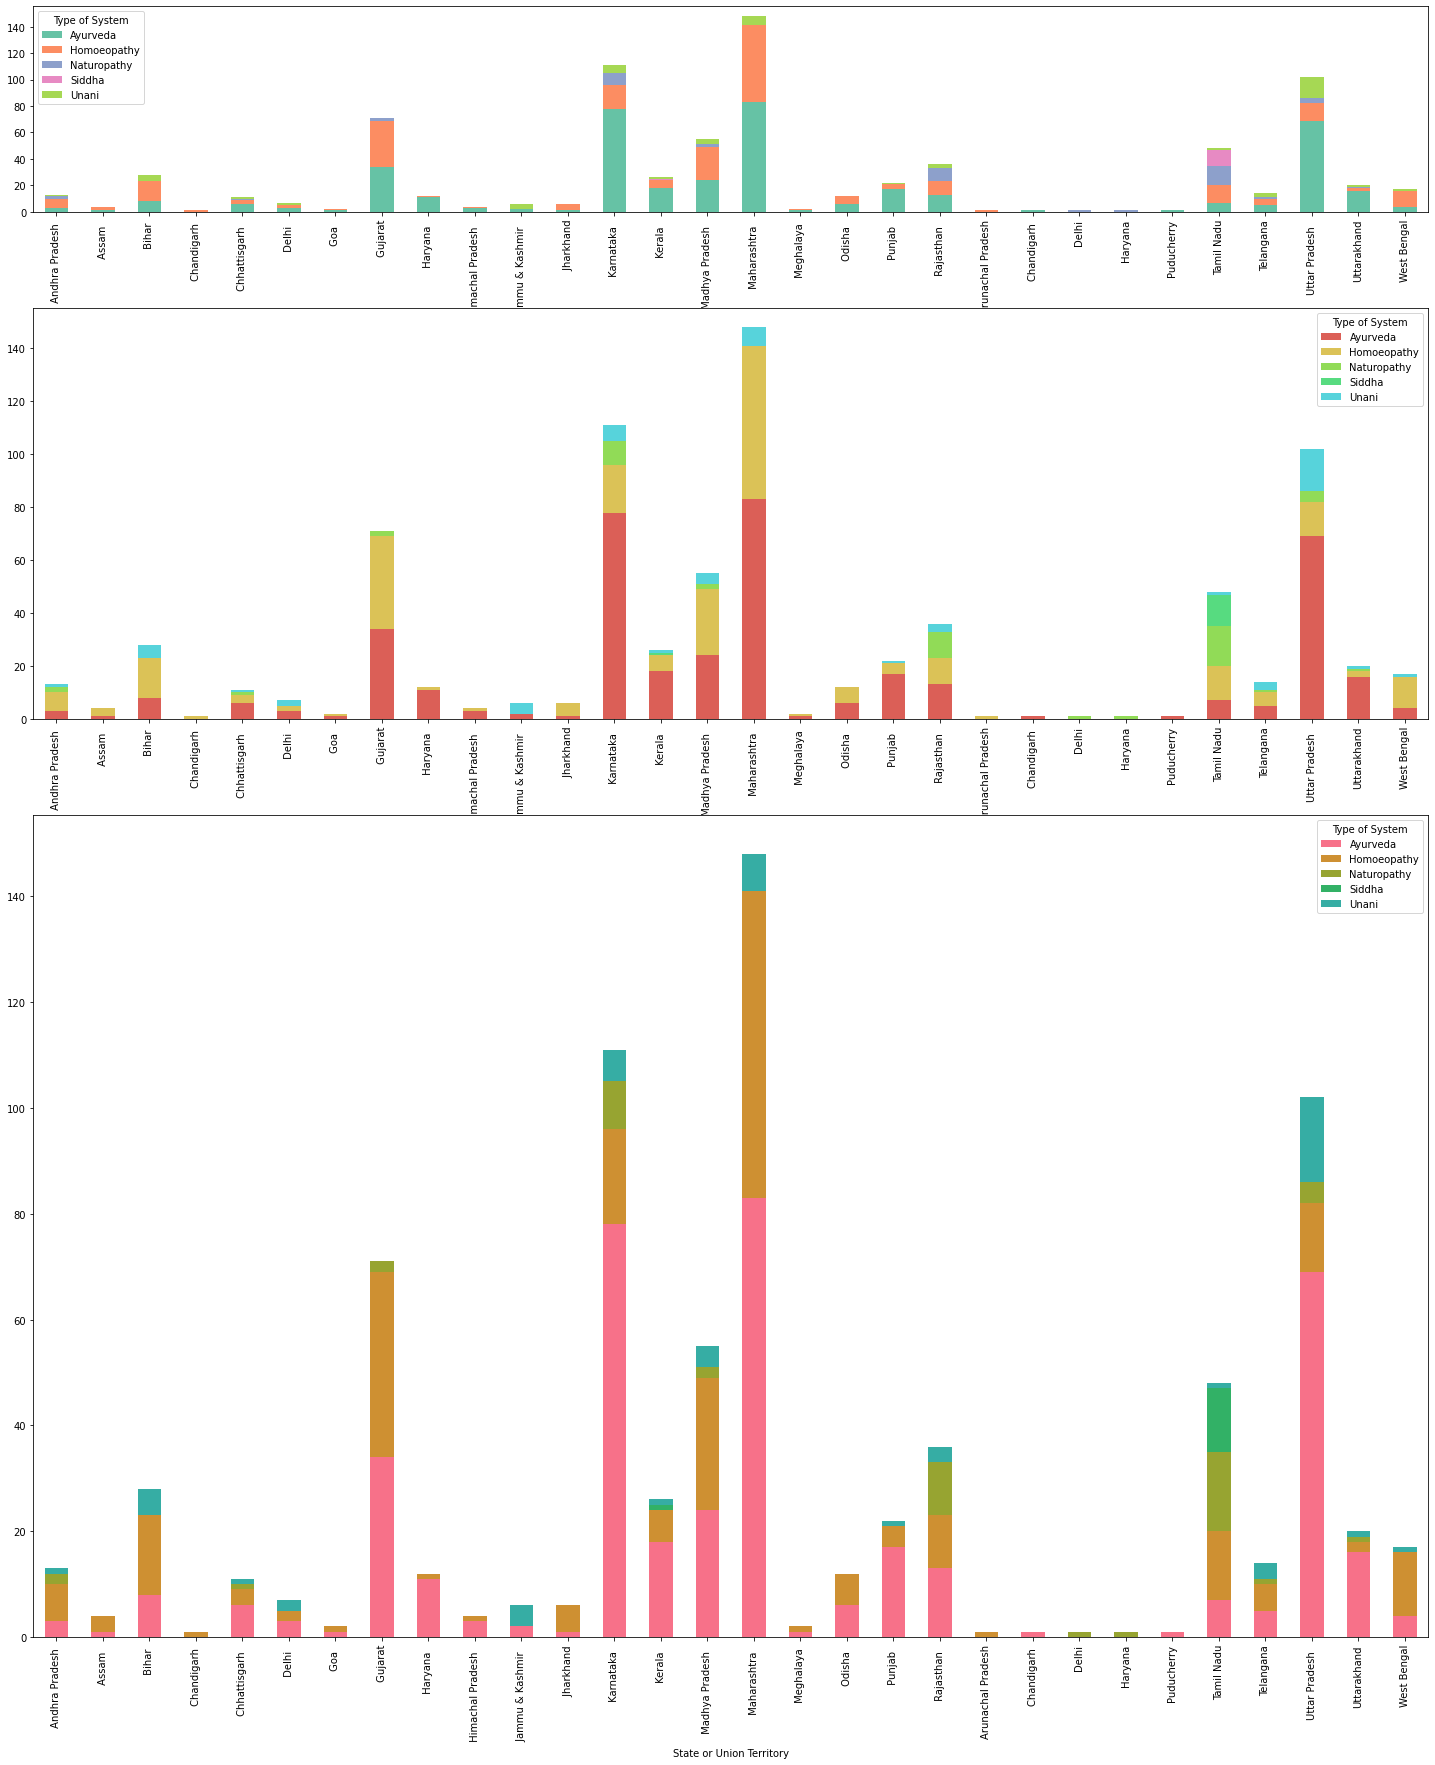

In [22]:
fig, axs = plt.subplots(3,gridspec_kw={'height_ratios': [1, 2, 4]})
pt_college_data.plot(kind='bar',ax=axs[0], stacked=True,figsize=(12,15))
sns.set_palette("hls", 8)
pt_college_data.plot(kind='bar',ax=axs[1], stacked=True,figsize=(15,20))
sns.set_palette("husl", 8)
pt_college_data.plot(kind='bar',ax=axs[2], stacked=True,figsize=(25,30))
sns.set_palette("Set2")
plt.show()

# part 3

In [23]:
transport_data.head()

,Name of the States,National Highways,State Highways,District Roads,Rural Roads,Urban Roads,Project Roads,Total road Length,Total Population,Road length per '000 pop,Road length per '000 Population - National Highways,Road length per '000 Population - State Highways,Road length per '000 Population - District Roads,Road length per '000 Population - Rural Roads,Road length per '000 Population - Urban roads,Road length per '000 Population - Project Roads
0,Andhra Pradesh,10207,15753,58083,217892,34878,9447,346260,84581,4.09,0.12,0.19,0.69,2.58,0.41,0.11
1,Arunachal Pradesh,2537,13500,8731,20807,56,4924,50555,1384,36.54,1.83,9.76,6.31,15.04,0.04,3.56
2,Assam,3909,2530,6093,303672,5603,21803,343609,31206,11.01,0.13,0.08,0.20,9.73,0.18,0.70
3,Bihar,4877,4006,11145,258800,9184,2559,290571,104099,2.79,0.05,0.04,0.11,2.49,0.09,0.02
4,Chhattisgarh,3592,4176,11965,54308,12765,15772,102578,25545,4.02,0.14,0.16,0.47,2.13,0.50,0.62


In [24]:
transport_data= transport_data[transport_data['Name of the States'] != 'INDIA (1) ++']

In [25]:
pt_transport_data = pd.pivot_table(transport_data, index=['Name of the States'], values=['National Highways','State Highways','District Roads'])

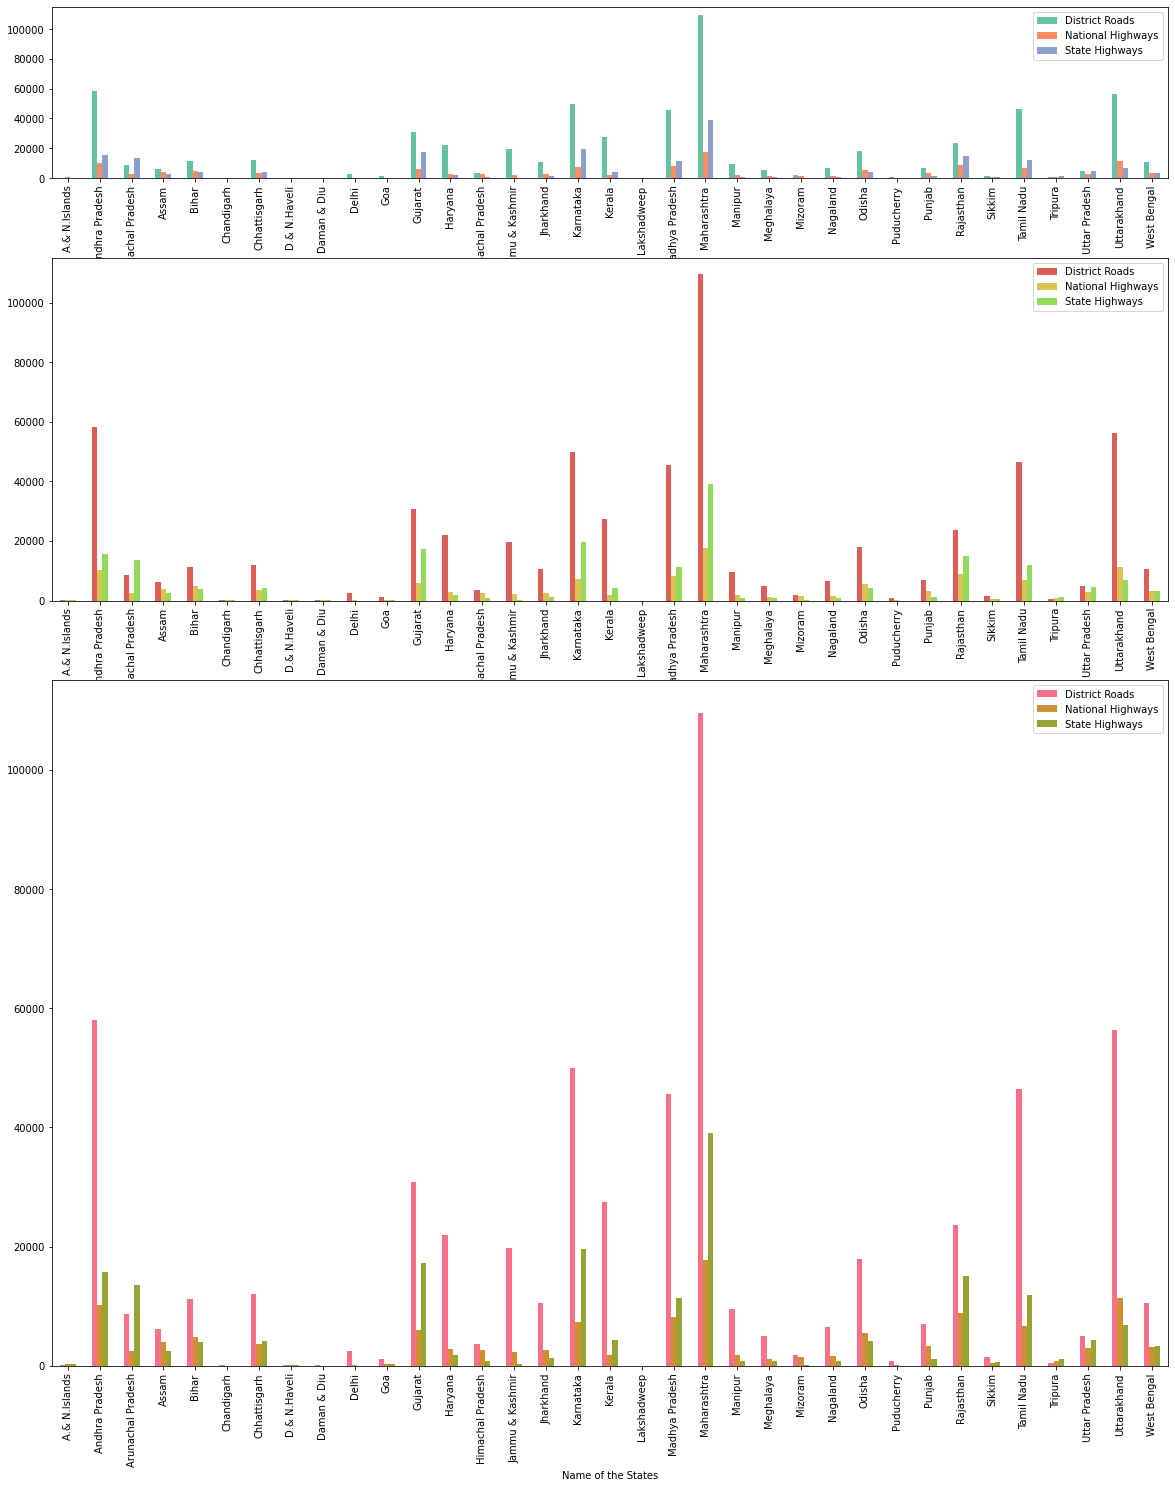

In [26]:
fig, axs = plt.subplots(3,gridspec_kw={'height_ratios': [1, 2, 4]})
pt_transport_data.plot(kind='bar',ax=axs[0],figsize=(20,25))
sns.set_palette("hls", 8)
pt_transport_data.plot(kind='bar',ax=axs[1])
sns.set_palette("husl", 8)
pt_transport_data.plot(kind='bar',ax=axs[2])
sns.set_palette("Set2")
plt.show()